FEUILLE DE TP 12

# Méthode de Newton

La méthode de Newton nous permet de calculer numériquement les zéros d'une fonction $f:[a,b]\rightarrow \mathbb{R}$, c'est-à-dire les solutions de l'équation $f(x) = 0$.

Supposons $f$ de classe $C^1$ et $x_0 \in (a,b)$ un point arbitraire. 

L'équation de la tangente au graphe de la fonction $f$ au point d'absisse $x_0$ est donnée par

\begin{equation}
y = f(x_0) + f'(x_0)(x-x_0)\,.
\end{equation}

Pour obtenir une approximation de la solution, on pose $y = 0$ et si $f'(x_0) \neq 0$ on obtient

\begin{equation}
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}\,.
\end{equation}

On peut alors répéter le même raisonnement en considérant $x_1$ au lieu de $x_0$ pour calculer l'approximation de 
$x_2$ et ainsi de suite. 


La méthode de Newton consiste donc à construire une suite d'approximations $x_k$ de la solution $x^*$ de l'équation $f(x) = 0$, définie par

\begin{equation}
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}\,, \qquad k\in \mathbb{N}\, . \qquad (1)
\end{equation}



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Calcul de valeurs approchées de nombres irrationnels 

Nous allons utiliser la méthode de Newton pour calculer des approximations de quelques nombres irrationnels. On considère

\begin{equation}
f_0(x) = x^3-2~ \text{ avec } ~ x\in [1,4] \, , \quad f_1(x) = \sin^2(x)~  \text{ avec } ~ x\in [2,4] 
\end{equation}

En appliquant la méthode de Newton à $f_0$ et $f_1$, on espère obtenir respectivement une approximation de $2^{1/3}$ et $\pi$. 



### Question 1

Définissez les fonctions $f_0$ et $f_1$, ainsi que leurs dérivés $f'_0$ et $f'_1$, et tracez-les sur leur intervalle de définition.


In [2]:
#DEFINIR LES FONCTIONS

def f0(x): 
    return np.power(x, 3) - 2

def f0prime(x): 
    return 3 * np.power(x, 2)

def f1(x): 
    return np.power(np.sin(x), 2)
    
def f1prime(x): 
    return 2 * np.cos(x) * np.sin(x)


Text(0.5, 1.0, 'Fonction f1 et sa dérivée')

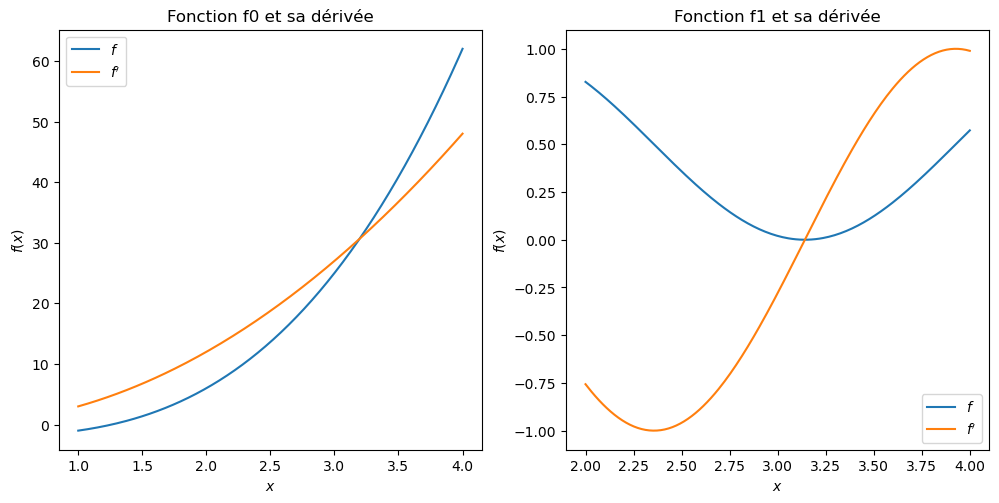

In [3]:
## COMPLETEZ ....
## METTRE LES GRAPHIQUES 
x0 = np.linspace(1, 4, 200)

# Graphique
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(x0, f0(x0), label=f'$f$')
ax.plot(x0, f0prime(x0), label=f"$f'$")
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Fonction f0 et sa dérivée')

x1 = np.linspace(2, 4, 200)
ax = fig.add_subplot(2, 2, 2)
ax.plot(x1, f1(x1), label=f'$f$')
ax.plot(x1, f1prime(x1), label=f"$f'$")
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Fonction f1 et sa dérivée')

###  Question 2

Avant d'implémenter la méthode de Newton (1) on a besoin de choisir un __critère d’arrêt__: à chaque itération $k$ de la méthode ce critère nous permet de décider s'il faut caluler l'approximation suivante ou arrêter l'algorithme. 

On choisira d’implémenter ici un critère d’arrêt donné par:

\begin{equation}
|f(x_k)|< \epsilon  \quad \text{ OU } \quad   k> N_{max}
\end{equation}

où $\epsilon>0$ est un réel fixé et $N_{max} \in \mathbb{N}$ est le nombre maximal d'itérations.




Écrire une fonction __newton__ prenant en argument:

- une fonction __fun__ 
- sa dérivée __funprime__ 
- une condition initiale $x_0$
- une tolérance $\epsilon>0$ pour le critère d’arrêt
- un nombre d'itération maximal $N_{max}$ pour le critère d’arrêt


et qui donne en sortie 

- le nombre d'itérations nécéssaires pour vérifier le critère d'arrêt,
- la solution approchée $x^*$ calculée avec la méthode de Newton.


In [52]:
def newton(fun, funprime, x0, epsilon,Nmax):
    """
    Algorithme de Newton pour résoudre f(x) = 0 
    
    Parameters
    ----------
    - fun: fonction(x) 
        fonction f
    - funprime: fonction(x)
        dérivé de f
    - x0: float 
        approximation initiale  
    - epsilon: float
        tolerance dans le critere d'arret
    - Nmax: int
        nombre d'iterations maximal

    Renvoie
    ----------
    - k: float
        nombre d'iteration
    - xstar: float
        solution approchée
    """
    k = 0
    xk = x0
    while np.abs(fun(xk)) > epsilon and k < Nmax:
        k += 1
        xk -= fun(xk)/funprime(xk)
    return k, xk

### Question 2 



Choisir un point $x_0$ arbitraire dans l'intervalle de définition des deux fonctions ci-dessus, calculer les solutions approchées $\tilde{x}_0$ et $\tilde{x}_1$ des équations $f_0(x) = 0$ et $f_1(x)=0$ en utilisant la méthode de Newton avec $\epsilon = 10^{-14}$ et $N_{max} = 1,2,\ldots,20$. 

Tracez le logarithme des erreurs $|\tilde{x}_0 - 2^{1/3}|$ et $|\tilde{x}_1 - \pi| $ en fonction de $N_{max}$.  

Qu'est-ce que vous observez ? Pourquoi les deux courbes sont-elles si différentes ?



Text(0.5, 1.0, 'Erreurs des valeurs x0 et x1')

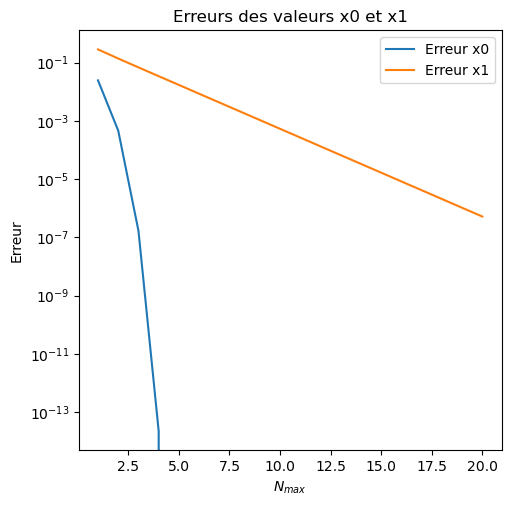

In [70]:
x0_sol = [[], []]
x1_sol = [[], []]

for n in range(1, 21):
    x0 = 1.1
    x1 = 2.3
    epsilon = 10e-14
    sol_f0 = newton(f0, f0prime, x0, epsilon, n)
    sol_f1 = newton(f1, f1prime, x1, epsilon, n)
    x0_sol[0].append(sol_f0[0])
    x0_sol[1].append(sol_f0[1])
    x1_sol[0].append(sol_f1[0])
    x1_sol[1].append(sol_f1[1])
    
xx0 = np.linspace(1, 4, 200)
xx1 = np.linspace(2, 3, 200)

# Graphique
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(x0_sol[0], np.abs(x0_sol[1] - np.power(2, 1/3)), label=f'Erreur x0')
ax.plot(x1_sol[0], np.abs(np.array(x1_sol[1]) - np.pi), label=f'Erreur x1')
ax.legend()
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N_{max}$')
ax.set_ylabel('Erreur')
ax.set_title('Erreurs des valeurs x0 et x1')

## Un exemple avec plusieurs solutions

Si on applique la méthode de Newton à une fonction $f$ telle que $f(x) = 0$ a plusieurs solutions, on peut s'attendre à deux résultats possibles: soit la méthode ne converge pas, soit elle converge vers un seul des zéros de $f$. En particulier la méthode peut converger vers des zéros différents si on choisit de points initiaux $x_0$ différents.

L'ensemble des $x_0$ tels que la méthode converge vers la solution $x^*$ s'appelle le __bassin d'attraction__ de $x^*$. 

### Question 3

Soit $f$ la fonction telle que $f(x) =x^3 - 4 x+ 1$. Combien l’équation $f(x) = 0$ admet-elle de solutions ?

Rechercher ces solutions avec la fonction __newton__ en initialisant successivement la méthode avec différentes valeurs initiales $x_0$. 

Tracer la fonction $f(x)$ et vérifier le résultat.

In [58]:
def f(x):
    """ definition de f """
    return np.power(x, 3) - 4 * x + 1

def fprime(x): 
    """ definition de f' """
    return 3 * np.power(x, 2) - 4

Solution pour x_start=-2.5
x_sol = -2.1864406779661016 pour 1 itérations
x_sol = -2.118117687826545 pour 2 itérations
x_sol = -2.114914460488018 pour 3 itérations
x_sol = -2.114907541509005 pour 4 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations
x_sol = -2.114907541476756 pour 5 itérations

Solution pour x_start=0
x_sol = 0.25 pour 1 itérations
x_sol = 0.254098

Text(0.5, 1.0, 'Fonction f et sa dérivée')

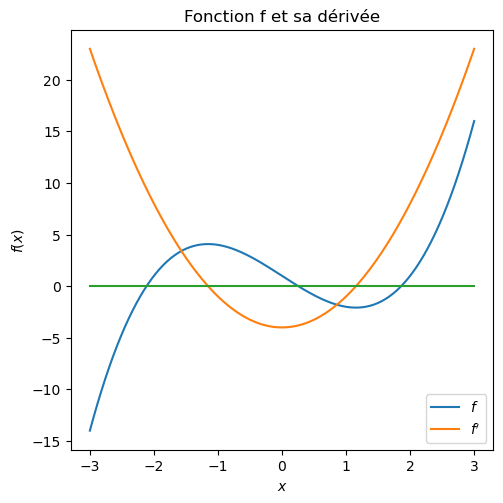

In [68]:
## VOTRE REPONSE ICI
# ON PEUT PRENDRE EN LE JUSTIFIANT : x0 = -2.5,   x0 = 0, x0 = 2.5
# NE PRENEZ PAS NMax TROP GRAND  (on pourra aussi justifier cela )
for x_start in [-2.5, 0, 2.5]:
    print(f"Solution pour x_start={x_start}")
    for n in range(1, 21):
        x_sol = newton(f, fprime, x_start, epsilon, n)
        print(f"x_sol = {x_sol[1]} pour {x_sol[0]} itérations")
    print("")

xx = np.linspace(-3, 3, 200)

# Graphique
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(xx, f(xx), label=f'$f$')
ax.plot(xx, fprime(xx), label=f"$f'$")
ax.plot(xx, np.zeros(xx.size))
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Fonction f et sa dérivée')

## Manipulation d'images en Python

On commence par importer le module matplotlib.image, puis on importe l’image image0.png et on l’affiche 


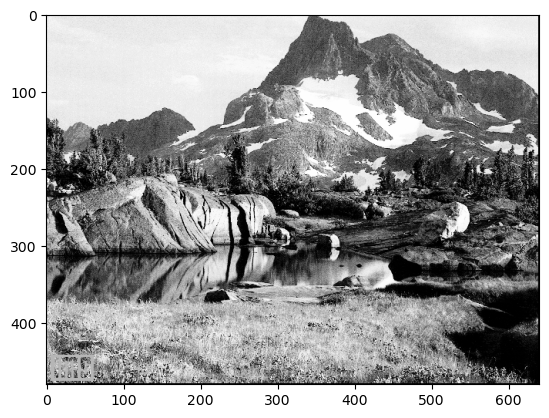

In [86]:
import matplotlib.image as mpimg

# DECOMMENTEZ  
img0 = mpimg.imread('image0.png')
plt.imshow(img0)


### Question 4

Quel objet python est img0? (Utiliser la fonction __type__)

Recommencer avec le fichier image1.png



<class 'numpy.ndarray'>


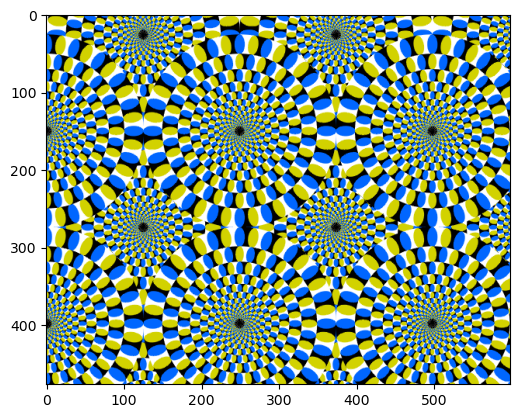

In [89]:
## VOTRE CODE ICI
print(type(img0))

img1 = mpimg.imread('image1.png')
plt.imshow(img1)

### Question 5

Les objet img0 et img1 sont des *numpy arrays* de taille $(N_x,N_y,3)$ où $N_x$ est le nombre de pixels (de points) dans la diréction horizontale et $N_y$ est le nombre de pixels dans la diréction verticale.

La couleur de chaque pixel est codée par un vecteur [R, G, B] de taille 3 dit RGB (ou RVB en français
rouge-vert-bleu). Chaque coordonnée varie entre 0 et 1 (ou 0 et 255 selon la convention). [1, 0, 0] code
le rouge, [0, 1, 0] le vert, [0, 0, 1] le bleu, [1, 1, 1] le blanc et [0, 0, 0] le noir. Par exemple:


In [90]:
print('La couleur du pixel de img0 de coordonnées (1,100) est donnée par [R G B]=', img0[1,100,:])
print('La couleur du pixel de img1 de coordonnées (50,100) est donnée par [R G B]=', img1[50,100,:])

La couleur du pixel de img0 de coordonnées (1,100) est donnée par [R G B]= [0.9372549 0.9372549 0.9372549 1.       ]
La couleur du pixel de img1 de coordonnées (50,100) est donnée par [R G B]= [0.  0.4 1.  1. ]


Créer une image de taille $N \times N$ pixels entièrement noire, puis blanche, puis rouge. Créer une autre image de taille $N \times N$ dont la moitié droite est rouge et la moitié gauche est bleue.

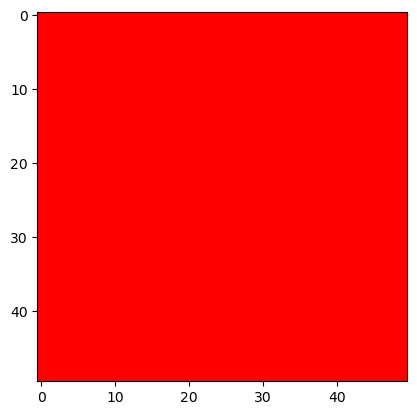

In [111]:
## VOTRE CODE ICI 
N = 50
imageBlack = np.zeros((N, N, 3))
plt.imshow(imageBlack)

imageWhite = np.ones((N, N, 3))
plt.imshow(imageWhite)

imageRed = np.ones((N, N, 3))
imageRed[::] = [1, 0, 0]
plt.imshow(imageRed)

imageDB = np.zeros((N, N, 3))
imageDB[]

## Fractale de Newton


On considère la fonction holomorphe $f:\mathbb{C} \rightarrow \mathbb{C}$ telle que

\begin{equation}
f(z) = z^3-1
\end{equation}

L'équation $f(z)= 0$ admets trois racines dinstinctes: 

\begin{equation}
 {r}_0 =  -\frac{1}{2}+ \frac{\sqrt{3}}{2} i,\quad {r}_1 =  -\frac{1}{2}- \frac{\sqrt{3}}{2} i\,,\quad r_2 = 1 \,.
\end{equation}

La méthode de Newton peut etre appliquée sans modifications aussi dans ce cas. 

Ici nous voulons étudier les __bassins d'attractions__ des différentes racines de $f$. 

### Question 6

Afin de définir le nombre complexe $z = x + i y$ en Python, on définit z = complex(x, y) par exemple

In [71]:
z = complex(4,3)
print('Soit z ={}, alors z^2 ={}'.format(z,z**2))

Soit z =(4+3j), alors z^2 =(7+24j)


Définir la fonction $f(z) = z^3-1$ ainsi que sa dérivée $f'$ et un np.array appelé __roots__ de taille 3 contenant les trois racines distinctes de f 

In [75]:
def f(z): 
    """definir f  """
    return np.power(z, 3) - 1

def fprime(z): 
    """ definir f' """
    return 3 * np.power(z, 2)
    
roots = np.array([complex(-1/2, np.sqrt(3)/2), complex(-1/2, - np.sqrt(3)/2), complex(1, 0)])


### Question 7

Implémenter une méthode de Newton modifiée __newtonMod__ à partir de la fonction __newton__ implémentée
dans la Question 2. On demande les modifications suivantes : on va utiliser le fait qu’on a une expression
algébrique des racines de f afin d’étudier plus simplement la dépendance de la méthode de Newton
en fonction de la condition initiale et on remplace le critère d’arrêt de la Question 2 par le critère d’arrêt:

\begin{equation}
|x_k − r_0| < \epsilon \quad \text{ OR }\quad |x_k − r_1| < \epsilon\quad\text{ OR }\quad |x_k − r_2| < \epsilon  \quad\text{ OR }\quad k > N_{max}
\end{equation}


La fonction __newtonMod__ doit avoir en sortie un argument additionnel par rapport à  la fonction __newton__:

- un entier $b$ pouvant prendre 4 valeurs: $b=-1$ si la la méthode n’a pas convergé (c'est-à-dire si on depasse le nombre d'iterations maximal), ou $b=j$ si la méthode a convergé vers la racine $r_j$  avec $j=0,1,2$.

In [98]:
def newtonMod(fun, funprime, x0, roots, epsilon,Nmax):
    """
    Algorithme de Newton pour résoudre f(x) = 0 
    avec des valeurs cibles de la racine fournies par le tableau roots (de taille 3): 
    Si la racine obenue coincide avec roots[i] on retournera l'indice i (voir le paramètre de sortie b ci-dessous).
    
    Parameters
    ----------
    - fun: fonction(x) 
        fonction f
    - funprime: fonction(x)
        dérivé de f
    - x0: float 
        approximation initiale
    - roots:
        tableau (de talle 3) des valeurs cibles de racine 
    - epsilon: float
        tolerance dans le critere d'arret
    - Nmax: int
        nombre d'iterations maximal

    Renvoie
    ----------
    - b : int
        indicateur de la racine
    - k: float
        nombre d'iteration
    - xstar: float
        solution approchée
    """
    xk = x0
    k = 0
    r0, r1, r2 = roots[0], roots[1], roots[2]
    while np.abs(xk - r0) > epsilon and np.abs(xk - r1) > epsilon and np.abs(xk - r2) > epsilon and k < Nmax:
        k += 1
        xk -= fun(xk)/funprime(xk)
    if k > Nmax:
        b = -1
    else:
        b = np.abs(roots - xk).argmin()
    return b, k, xk

### Question 8


Définir un vecteur $p$ de taille $N$, obtenus en divisant l'interval $[-1,1]$ en $N-1$ sous-intervalles égaux.

Définir une images noire de taille $N \times N$ comme dans l'exercice 5 et l'appeler __image0__ .

Chaque pixel d' __image0__ corresponde à un point dans le carré $[-1,1]\times [-1,1]$. 
Pour chaque pixel corréspondant aux indices $(i_x,i_y)$, appellez la méthode __newtonMod__ en prenant pour condition initiale le nombre complexe 

\begin{equation}
z_0 = a+ i\, b \,, \quad \text{ où } \quad a= p[i_x] \, \text{ et }\, b= p[i_y] 
\end{equation}


et colorier le pixel $(i_x,i_y)$ de __image0__ en noir si la méthode n’a pas convergé et sinon en rouge, vert ou bleu selon la racine vers
laquelle elle a convergé. 



Essayer avec N = 50 puis N = 500.



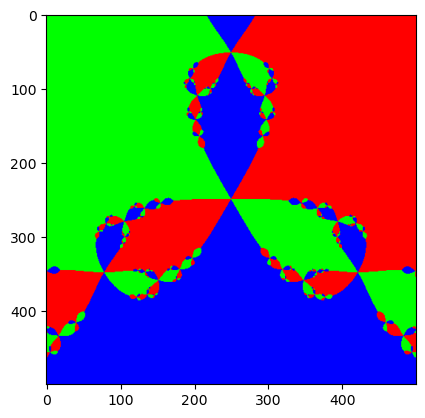

In [100]:
# VOTRE CODE ICI
N = 500
p = np.linspace(-1, 1, N)
image0 = np.zeros((N, N, 3))
for i in range(N):
    for j in range(N):
        z0 = complex(p[i], p[j])
        b, k, x = newtonMod(f, fprime, z0, roots, 10e-14, 5)
        if b == -1:
            image0[i, j] = [0, 0, 0]
        elif b == 0:
            image0[i, j] = [1, 0, 0]
        elif b == 1:
            image0[i, j] = [0, 1, 0]
        elif b == 2:
            image0[i, j] = [0, 0, 1]
            
plt.imshow(image0)

### Question 9

Sur une nouvelle image, colorier de manière similaire chaque pixel sur une échelle de gris proportionnellement
au nombre d’itérations $k$ nécessaires à la convergence de la méthode, $k/N_{max} \in [0, 1]$; c'est-à-dire en saisissant le code [R G B] donné par $[k/N_{max},k/N_{max},k/N_{max}]$


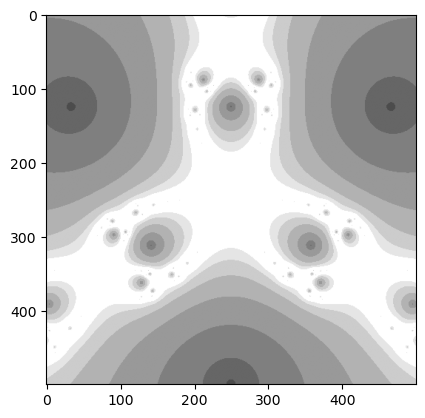

In [103]:
# VOTRE CODE ICI 
N = 500
Nmax = 10
p = np.linspace(-1, 1, N)
image0 = np.zeros((N, N, 3))
for i in range(N):
    for j in range(N):
        z0 = complex(p[i], p[j])
        b, k, x = newtonMod(f, fprime, z0, roots, 10e-14, Nmax)
        image0[i, j] = [k/Nmax, k/Nmax, k/Nmax]
            
plt.imshow(image0)


### Question 10

Commentez les  observations

